In [2]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=54006eacc5842a51db75ecf15adcc78d57d8f92fe96b7c041a9d0ff8e25d51e5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="D0iLK1yd2d3mAdFhxQul")

project = rf.workspace().project("clothing-detection-scn9m")
model = project.version(1).model

path = "/content/1758351_28376532_0.jpg"
prediction = model.predict(path, confidence=40, overlap=30).json()

object_num = len(prediction['predictions'])
object_name = [prediction['predictions'][i]['class'] for i in range(object_num)]

loading Roboflow workspace...
loading Roboflow project...


In [8]:
prediction["predictions"][0]

{'x': 301.5,
 'y': 458.5,
 'width': 121.0,
 'height': 215.0,
 'confidence': 0.8707602620124817,
 'class': 'pants',
 'image_path': '/content/1758351_28376532_0.jpg',
 'prediction_type': 'ObjectDetectionModel'}

In [9]:
object_name

['jacket', 'pants', 'shoe']

In [8]:
# infer on a local image
# print(model.predict("/content/1840231_36736891_0.jpg", confidence=40, overlap=30).json())

# visualize your prediction
path = "/content/1758351_28376532_0.jpg"
model.predict(path, confidence=40, overlap=30).save(path)

# infer on an image hosted elsewhere
# print(model.predict("https://image.msscdn.net/data/estimate/1388775_0/gallery_647d182c2bccf.jpg", hosted=True, confidence=40, overlap=30).json())

In [2]:
path = "/content/1758351_28376532_0.jpg"
prediction = model.predict(path, confidence=40, overlap=30).json()

NameError: ignored

In [28]:
object_num = len(prediction['predictions'])
object_name = [prediction['predictions'][i]['class'] for i in range(object_num)]

['shoe', 'pants', 'jacket']

In [12]:
import cv2

In [17]:
def image_crop(img,prediction,object):
  num = 0
  x= prediction['predictions'][num]['x']
  y = prediction['predictions'][num]['y']
  w = prediction['predictions'][num]['width']
  h = prediction['predictions'][num]['height']
  img = cv2.imread(img)
  cropped = img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]
  return cropped

img = '/content/1758351_28376532_0.jpg'
cropped_img = image_crop(img,prediction,'jacket')

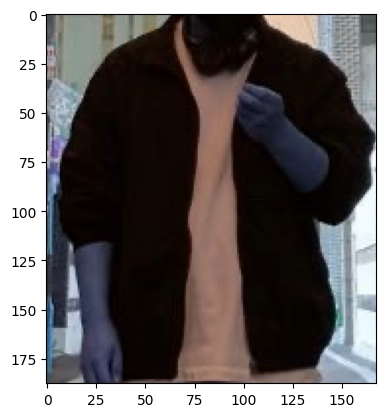

In [18]:
import matplotlib.pyplot as plt
plt.imshow(cropped_img)

In [ ]:
print(model.predict("https://image.msscdn.net/images/style/detail/33648/detail_33648_1_500.jpg", hosted=True, confidence=40, overlap=30).json())
model.predict("https://image.msscdn.net/images/style/detail/33648/detail_33648_1_500.jpg", hosted=True, confidence=40, overlap=30).save('1.jpg')

{'predictions': [{'x': 366.5, 'y': 376.5, 'width': 259.0, 'height': 369.0, 'confidence': 0.8381011486053467, 'class': 'shirt', 'image_path': 'https://image.msscdn.net/images/style/detail/33648/detail_33648_1_500.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 368.0, 'y': 370.0, 'width': 276.0, 'height': 370.0, 'confidence': 0.8378270864486694, 'class': 'jacket', 'image_path': 'https://image.msscdn.net/images/style/detail/33648/detail_33648_1_500.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 355.0, 'y': 769.5, 'width': 218.0, 'height': 455.0, 'confidence': 0.8337901830673218, 'class': 'pants', 'image_path': 'https://image.msscdn.net/images/style/detail/33648/detail_33648_1_500.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 357.0, 'y': 982.0, 'width': 230.0, 'height': 102.0, 'confidence': 0.6032354831695557, 'class': 'shoe', 'image_path': 'https://image.msscdn.net/images/style/detail/33648/detail_33648_1_500.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'i

{'predictions': [{'x': 304.5, 'y': 431.0, 'width': 167.0, 'height': 338.0, 'confidence': 0.8826315402984619, 'class': 'pants', 'image_path': '/content/1627892_36712724_0.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 297.0, 'y': 159.5, 'width': 250.0, 'height': 287.0, 'confidence': 0.8444738388061523, 'class': 'jacket', 'image_path': '/content/1627892_36712724_0.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 308.5, 'y': 584.0, 'width': 135.0, 'height': 32.0, 'confidence': 0.4816056191921234, 'class': 'shoe', 'image_path': '/content/1627892_36712724_0.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '600', 'height': '600'}}


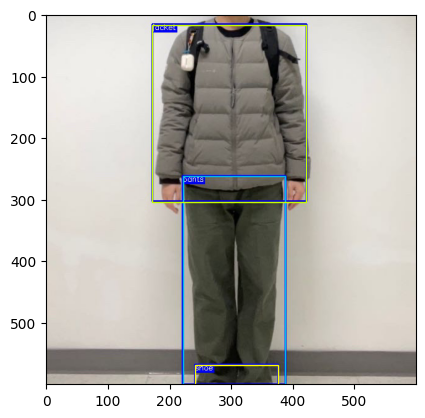

In [ ]:
print(prediction.json())
prediction.plot()

In [ ]:
model.predict("/content/2391745_36321550_0.jpg", confidence=40, overlap=30).save("/content/2391745_36321550_0.jpg")

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D0iLK1yd2d3mAdFhxQul")
project = rf.workspace("object-detection-bounding-box-fg9op").project("clothing-detection-scn9m")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e400b5ff6a2cda1794d3a5ded3e81413e2f972e389d46b50219fe2d9f56017e4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Clothing-Detection-1 in yolov8:: 100%|██████████| 8134/8134 [00:04<00:00, 1929.63it/s]
